In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

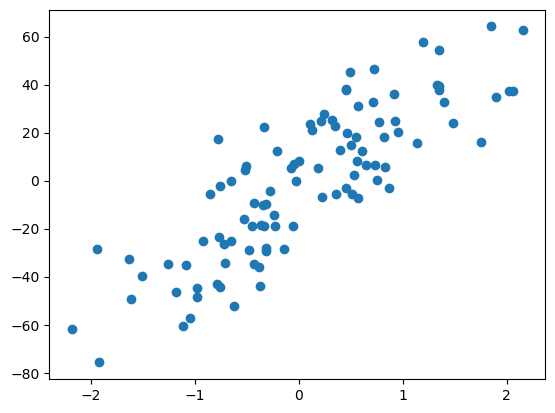

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [ ]:
from sklearn.linear_model import Lasso

In [6]:
rr = Lasso(alpha=0.1)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

<IPython.core.display.Javascript object>

[27.71294347]
-2.288019090203184


In [7]:
rr1 = Lasso(alpha=1)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

<IPython.core.display.Javascript object>

[26.67661545]
-2.227489873939024


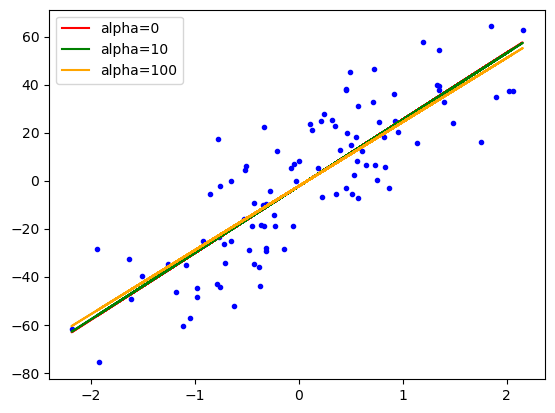

In [ ]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=0.1')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=1')
plt.legend()

# CODE FROM SCRATCH

In [9]:
class MeraLasso:
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean())
            den = den + (X_train[i] - X_train.mean()) ** 2
            
        self.m = (num-self.alpha)/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m,self.b)
        
    def predict(self,X_test):
        y_pred = self.m * X_test + self.b
        return y_pred

In [12]:
ll = MeraLasso(alpha=0.1)

In [13]:
ll.fit(X,y)

[27.82693956] [-2.2946773]


In [16]:
y_pred_ll = ll.predict(X)